# Analisis de la población de México

In [1]:
# CORRER SOLO SI NO SE HAN INSTALADO   
# %pip install geopandas
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install openpyxl

In [2]:
# Importamos librerias necesarias

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [3]:
# Leemos los datos por seccion electoral
secciones = gpd.read_file("../Data/SHAPEFILE/SECCION.shp")

In [4]:
# Leemos los datos del censo del 2020
censo = pd.read_csv("../Data/INE_SECCION_2020.csv")

In [5]:
# slp = secciones[secciones['ENTIDAD'] == 5]
# slp_w_vars = slp.merge(censo, left_on=['SECCION', 'ENTIDAD', 'MUNICIPIO'], right_on=['SECCION', 'ENTIDAD', 'MUNICIPIO'])
# slp_w_vars['area_seccion_m2'] = slp_w_vars.geometry.area
# slp_w_vars['area_seccion_km2'] = slp_w_vars['area_seccion_m2'] / 1000
# slp_w_vars['hogs_km2'] = slp_w_vars['TOTHOG'] / slp_w_vars['area_seccion_km2']
# slp_w_vars['SHARE_PEA'] = slp_w_vars['PEA'] / slp_w_vars['POBTOT']
# fig, ax = plt.subplots(figsize=(10, 10))
# slp_w_vars.plot(column='SHARE_PEA', ax=ax, cmap='Reds', legend=True, edgecolor='grey', linewidth=0.1)
# ax.set_axis_off()
# plt.title("PEA como % de la población en SLP")
# plt.show()

In [6]:
# # Definimos una fracción del conjunto de datos para cada Entidad Federativa

# aguas = secciones[secciones['ENTIDAD'] == 1] #Aguascalientes
# bc = secciones[secciones['ENTIDAD'] == 2] #Baja California
# bcs = secciones[secciones['ENTIDAD'] == 3] #Baja California Sur
# camp = secciones[secciones['ENTIDAD'] == 4] #Campeche
# coahuila = secciones[secciones['ENTIDAD'] == 5] #Coahuila
# col = secciones[secciones['ENTIDAD'] == 6] #Colima
# chiapas = secciones[secciones['ENTIDAD'] == 7] #Chiapas
# chih = secciones[secciones['ENTIDAD'] == 8] #Chihuahua
# cdmx =  secciones[secciones['ENTIDAD'] == 9] #Ciudad de Mexico
# dur = secciones[secciones['ENTIDAD'] == 10] #Durango
# guanj = secciones[secciones['ENTIDAD'] == 11] #Guanajuato
# guerr = secciones[secciones['ENTIDAD'] == 12] #Guerrero
# hid = secciones[secciones['ENTIDAD'] == 13] #Hidalgo
# jalis = secciones[secciones['ENTIDAD'] == 14] #Jalisco
# mex = secciones[secciones['ENTIDAD'] == 15] #Mexico 
# mich = secciones[secciones['ENTIDAD'] == 16] #Michoacan
# more = secciones[secciones['ENTIDAD'] == 17] #Morelos
# nay = secciones[secciones['ENTIDAD'] == 18] #Nayarit
# nl = secciones[secciones['ENTIDAD'] == 19] #Nueva Leon
# oax = secciones[secciones['ENTIDAD'] == 20] #Oaxaca
# pueb = secciones[secciones['ENTIDAD'] == 21] #Puebla
# quert = secciones[secciones['ENTIDAD'] == 22] #Queretaro
# quintr = secciones[secciones['ENTIDAD'] == 23] #Quintana Roo
# slp = secciones[secciones['ENTIDAD'] == 24] #San Luis Potosi
# sina = secciones[secciones['ENTIDAD'] == 25] #Sinaloa
# sonora = secciones[secciones['ENTIDAD'] == 26] #Sonora
# tabs = secciones[secciones['ENTIDAD'] == 27] #Tabasco
# tamp = secciones[secciones['ENTIDAD'] == 28] #Tamaulipas
# tlax = secciones[secciones['ENTIDAD'] == 29] #Tlaxcala
# vera = secciones[secciones['ENTIDAD'] == 30] #Veracruz
# yuct = secciones[secciones['ENTIDAD'] == 31] #Yucatan
# zact = secciones[secciones['ENTIDAD'] == 32] #Zacatecas

# # Creamos un diccionario con cada nuevo conjunto de datos
# estados = {"Aguascalientes": aguas, "Baja California": bc, "Baja California Sur": bcs, "Campeche": camp, "Coahuila": coahuila, "Colima": col, "Chiapas": chiapas, "Chihuahua": chih, "Ciudad de México": cdmx, "Durango": dur, "Guanajuato": guanj, "Guerrero": guerr, "Hidalgo": hid, "Jalisco": jalis, "Estado de México": mex, "Michoacán": mich, "Morelos": more, "Nayarit": nay, "Nuevo León": nl, "Oaxaca": oax, "Puebla": pueb, "Queretaro": quert, "Quintana Roo": quintr, "San Luis Potosí": slp, "Sinaloa": sina, "Sonora": sonora, "Tabasco": tabs, "Tampico": tamp, "Tlaxcala": tlax, "Veracruz": vera, "Yucatán": yuct, "Zacatecas": zact}


In [7]:
# # Creamos dos visualizaciones por cada estado, una que muestre la población total y la población económicamente activa como porcentaje de la población 
# for i in estados:
#     estado = estados[i]
#     estado_w_vars = estado.merge(censo, left_on=['SECCION', 'ENTIDAD', 'MUNICIPIO'], right_on=['SECCION', 'ENTIDAD', 'MUNICIPIO'])
#     estado_w_vars['SHARE_PEA'] = estado_w_vars['PEA'] / estado_w_vars['POBTOT']
#     estado_w_vars.loc[estado_w_vars['SHARE_PEA'] < 0, 'SHARE_PEA'] = 0
#     fig, ax = plt.subplots(figsize=(10, 10))

#     estado_w_vars.plot(column='SHARE_PEA', ax=ax, cmap='Reds', legend=True, edgecolor='grey', linewidth=0.1, legend_kwds={'label': 'Porcentaje', 'orientation': 'horizontal'})
#     ax.set_axis_off()
#     ax.set_title(f"Figura #: PEA como % de la población en {i}", fontsize=16, fontweight='bold')
#     plt.figtext(0.65, 0.01, "Fuente: Elaboración propia con datos sobre censo poblacional por sección electoral, INEGI, 2020", ha="right", fontsize=8, style='italic')
#     plt.show()
    
#     fig, ax = plt.subplots(figsize=(10, 10))
#     estado_w_vars.plot(column='POBTOT', ax=ax, cmap='Reds', legend=True, edgecolor='grey', linewidth=0.1, legend_kwds={'label': 'Habitantes', 'orientation': 'horizontal'})
#     ax.set_axis_off()
#     ax.set_title(f"Figura #: Población total en {i}", fontsize=16, fontweight='bold')
#     plt.figtext(0.65, 0.01, "Fuente: Elaboración propia con datos sobre censo poblacional por sección electoral, INEGI, 2020", ha="right", fontsize=8, style='italic')
#     plt.show()

In [8]:
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages

# # Create a PDF file to store the plots
# with PdfPages('output_plots.pdf') as pdf:
#     for i in estados:
#         estado = estados[i]
#         estado_w_vars = estado.merge(censo, left_on=['SECCION', 'ENTIDAD', 'MUNICIPIO'], right_on=['seccion', 'entidad', 'municipio'])
#         estado_w_vars['area_seccion_m2'] = estado_w_vars.geometry.area
#         estado_w_vars['area_seccion_km2'] = estado_w_vars['area_seccion_m2'] / 1000
#         estado_w_vars['hogs_km2'] = estado_w_vars['tothog'] / estado_w_vars['area_seccion_km2']
#         estado_w_vars['share_pea'] = estado_w_vars['pea'] / estado_w_vars['pobtot']
#         estado_w_vars.loc[estado_w_vars['share_pea'] < 0, 'share_pea'] = 0
        
#         # Plot 1: PEA share as % of population
#         fig, ax = plt.subplots(figsize=(10, 10))
#         estado_w_vars.plot(column='share_pea', ax=ax, cmap='Reds', legend=True, edgecolor='grey', linewidth=0.1)
#         ax.set_axis_off()
#         plt.title(f"PEA como % de la población en {i}")
#         pdf.savefig(fig)  # Save the figure to the PDF
#         plt.close(fig)  # Close the figure to free memory

#         # Plot 2: Total population
#         fig, ax = plt.subplots(figsize=(10, 10))
#         estado_w_vars.plot(column='pobtot', ax=ax, cmap='Reds', legend=True, edgecolor='grey', linewidth=0.1)
#         ax.set_axis_off()
#         plt.title(f"Población total en {i}")
#         pdf.savefig(fig)  # Save the figure to the PDF
#         plt.close(fig)  # Close the figure to free memory


In [9]:
# Leemos los datos por municipio
municipios = gpd.read_file("../Data/mg_2023_integrado/conjunto_de_datos/00mun.shp")

In [10]:
# Definimos una función para leer archivos de excel que contienen información del censo por municipio
def process_excel_files(directory):
    files = glob.glob(os.path.join(directory, "cpv2020_b_*_01_poblacion.xlsx"))
    dfs = []

    for file in files:
        df = pd.read_excel(file, sheet_name=1, skiprows=5)
        if 'Demarcación territorial' in df.columns:
            df = df.rename(columns={'Demarcación territorial': 'Municipio'})
        df = df[["Entidad federativa", "Municipio", "Localidades/Población", "Total de localidades y población1"]]
        df[['CVE_ENT', 'NAME_ENT']] = df['Entidad federativa'].str.split(' ', n=1, expand=True)
        df[['CVE_MUN', 'NAME_MUN']] = df['Municipio'].str.split(' ', n=1, expand=True)
        df = df[df['Localidades/Población'] == 'Población']
        df = df[df['CVE_MUN'] != 'Total']
        df = df.rename(columns={"Total de localidades y población1": "POB"})
        df = df.drop(columns=['Entidad federativa', 'Municipio', 'Localidades/Población'])
        dfs.append(df)
    result = pd.concat(dfs, ignore_index=True)
    
    return result

# Leemos y extrameos los datos
directory = '../Data/CensoMunicipios/'
combined_df = process_excel_files(directory)

In [11]:
# Juntamos la información del censo con los datos por municipio
municipios_w_vars = municipios.merge(combined_df, left_on=['CVE_ENT', 'CVE_MUN'], right_on=['CVE_ENT', 'CVE_MUN'])

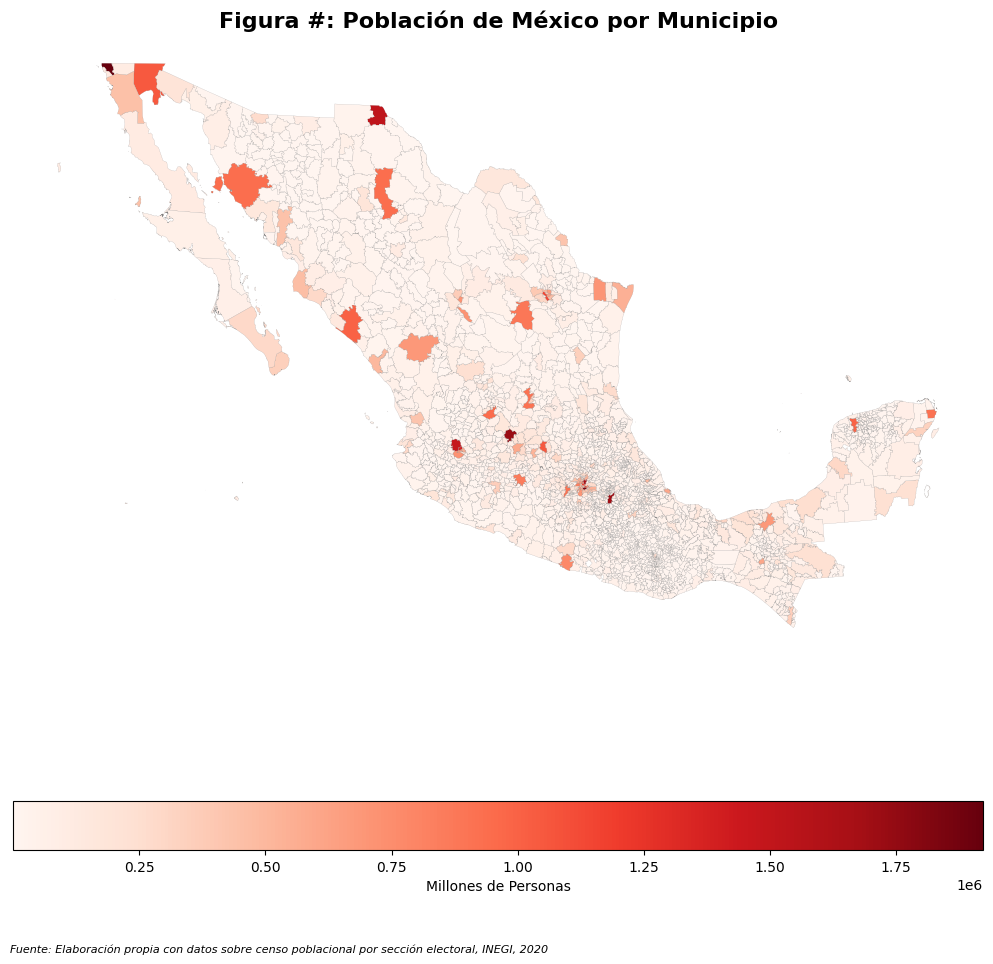

In [12]:
# Realizamos una visualización de la población por municipio
fig, ax = plt.subplots(figsize=(10, 10))
municipios_w_vars.plot(column='POB', ax=ax, cmap='Reds', legend=True, edgecolor='grey', linewidth=0.1, legend_kwds={'label': 'Millones de Personas', 'orientation': 'horizontal'})
ax.set_axis_off()
ax.set_title("Figura #: Población de México por Municipio", fontsize=16, fontweight='bold')
plt.figtext(0.55, 0.01, "Fuente: Elaboración propia con datos sobre censo poblacional por sección electoral, INEGI, 2020", ha="right", fontsize=8, style='italic')
plt.tight_layout()
plt.show()

In [13]:
# Definimos una función para leer los archivos xlsx del censo para obtener informacion de la población menor a 9 años
def process_excel_files_children(directory):
    files = glob.glob(os.path.join(directory, "cpv2020_b_*_01_poblacion.xlsx"))
    dfs = []

    for file in files:
        df = pd.read_excel(file, sheet_name=2, skiprows=5)
        if 'Demarcación territorial' in df.columns:
            df = df.rename(columns={'Demarcación territorial': 'Municipio'})
        df = df[["Entidad federativa", "Municipio", "Grupos quinquenales de edad", "Sexo", "Población total1"]]
        df = df[
            (df["Grupos quinquenales de edad"].isin(["00-04 años", "05-09 años"])) &
            (df["Sexo"] == "Total")]
        df[['CVE_ENT', 'NAME_ENT']] = df['Entidad federativa'].str.split(' ', n=1, expand=True)
        df[['CVE_MUN', 'NAME_MUN']] = df['Municipio'].str.split(' ', n=1, expand=True)
        df_grouped = df.groupby(['CVE_ENT', 'NAME_ENT', 'CVE_MUN', 'NAME_MUN'])['Población total1'].sum().reset_index()
        df_grouped = df_grouped.rename(columns={'Población total1': 'POB_NIÑOS'})
        dfs.append(df_grouped)
    result = pd.concat(dfs, ignore_index=True)
    
    return result

# Leemos y extrameos los datos
directory = '../Data/CensoMunicipios/'
combined_df_children = process_excel_files_children(directory)

In [14]:
# Juntamos los datos del censo para población infantil con lo datos por municipio
municipios_w_vars_children = municipios.merge(combined_df_children, left_on=['CVE_ENT', 'CVE_MUN'], right_on=['CVE_ENT', 'CVE_MUN'])

In [15]:
# Calculamos el porcentaje de población infantil de cada municipio
municipios_w_vars_children["POB_NIÑOS_PER"] = municipios_w_vars_children["POB_NIÑOS"] / municipios_w_vars["POB"]

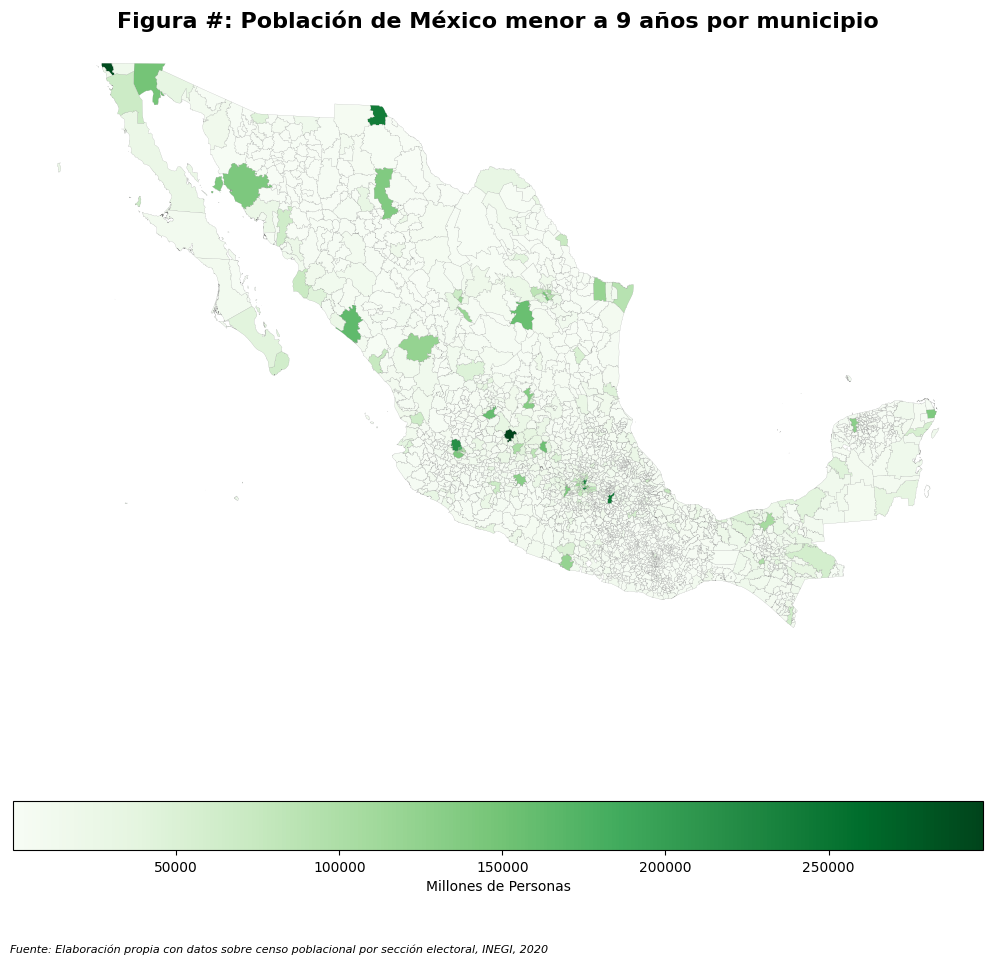

In [16]:
# Visualizamos la población infantil por municipio
fig, ax = plt.subplots(figsize=(10, 10))
municipios_w_vars_children.plot(column='POB_NIÑOS', ax=ax, cmap='Greens', legend=True, edgecolor='grey', linewidth=0.1, legend_kwds={'label': 'Millones de Personas', 'orientation': 'horizontal'})
ax.set_axis_off()
ax.set_title("Figura #: Población de México menor a 9 años por municipio", fontsize=16, fontweight='bold')
plt.figtext(0.55, 0.01, "Fuente: Elaboración propia con datos sobre censo poblacional por sección electoral, INEGI, 2020", ha="right", fontsize=8, style='italic')
plt.tight_layout()
plt.show()

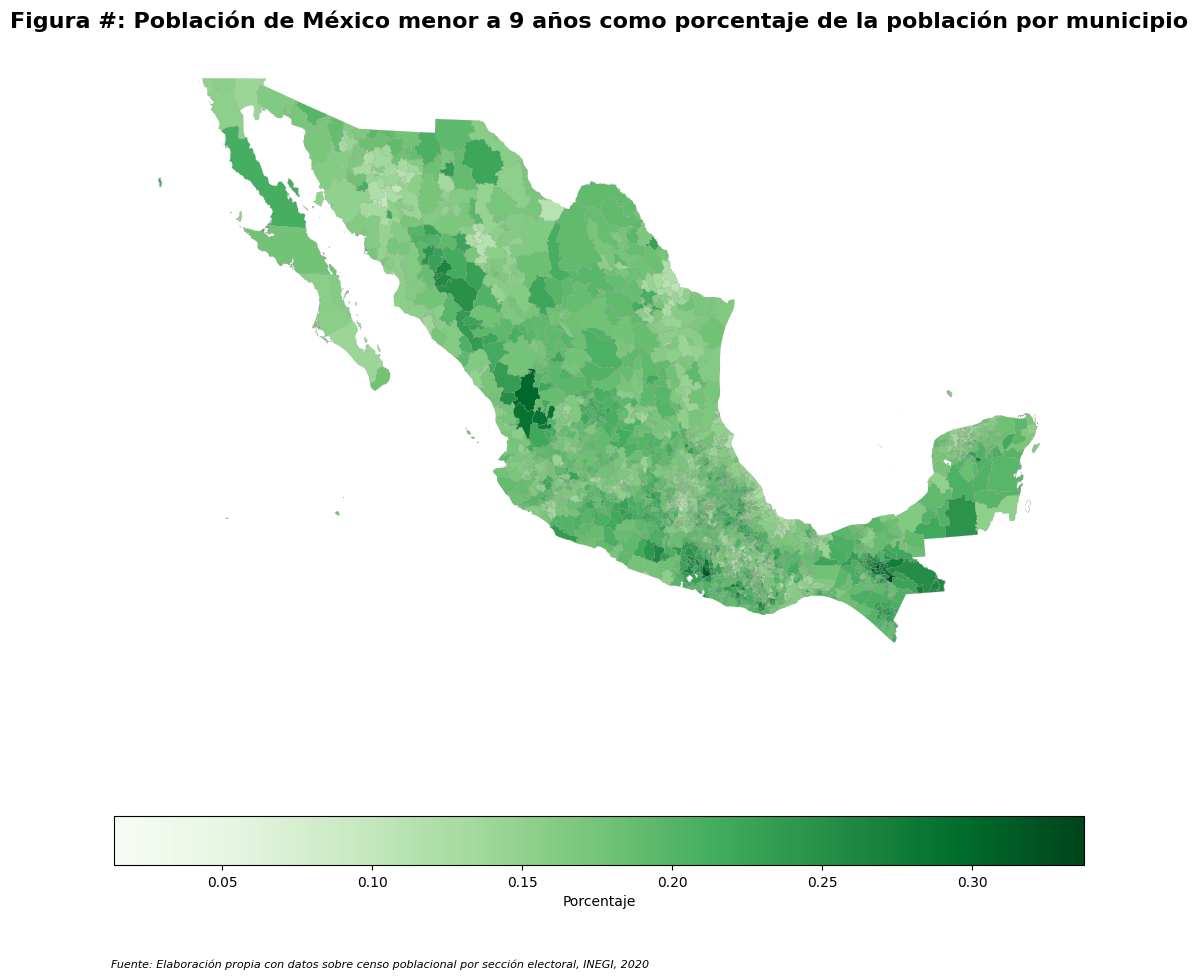

In [17]:
# Visualizamos el porcentaje de la población infantil por municipio
fig, ax = plt.subplots(figsize=(10, 10))
municipios_w_vars_children.plot(column='POB_NIÑOS_PER', ax=ax, cmap='Greens', legend=True, edgecolor='grey', linewidth=0.1, legend_kwds={'label': 'Porcentaje', 'orientation': 'horizontal'})
ax.set_axis_off()
ax.set_title("Figura #: Población de México menor a 9 años como porcentaje de la población por municipio", fontsize=16, fontweight='bold')
plt.figtext(0.55, 0.01, "Fuente: Elaboración propia con datos sobre censo poblacional por sección electoral, INEGI, 2020", ha="right", fontsize=8, style='italic')
plt.tight_layout()
plt.show()

In [18]:
# Definimos una función para extraer la información del censo referente a la población mayor a 60 años
def process_excel_files_senior(directory):
    files = glob.glob(os.path.join(directory, "cpv2020_b_*_01_poblacion.xlsx"))
    dfs = []
    
    for file in files:
        df = pd.read_excel(file, sheet_name=2, skiprows=5)
        if 'Demarcación territorial' in df.columns:
            df = df.rename(columns={'Demarcación territorial': 'Municipio'})
        df = df[["Entidad federativa", "Municipio", "Grupos quinquenales de edad", "Sexo", "Población total1"]]
        df = df[
            (df["Grupos quinquenales de edad"].isin(["60-64 años", "65-69 años", "70-74 años", "75-79 años", "80-84 años", "85-89 años", "90-94 años", "95-99 años", "100 años y más"])) &
            (df["Sexo"] == "Total")]
        df[['CVE_ENT', 'NAME_ENT']] = df['Entidad federativa'].str.split(' ', n=1, expand=True)
        df[['CVE_MUN', 'NAME_MUN']] = df['Municipio'].str.split(' ', n=1, expand=True)
        df_grouped = df.groupby(['CVE_ENT', 'NAME_ENT', 'CVE_MUN', 'NAME_MUN'])['Población total1'].sum().reset_index()
        df_grouped = df_grouped.rename(columns={'Población total1': 'POB_SENIOR'})
        dfs.append(df_grouped)
    result = pd.concat(dfs, ignore_index=True)
    
    return result

# Leemos y extraemos los datos
directory = '../Data/CensoMunicipios/'
combined_df_senior = process_excel_files_senior(directory)

In [19]:
# Juntamos los datos de la poblacion mayor a 60 años con los datos por municipio
municipios_w_vars_senior = municipios.merge(combined_df_senior, left_on=['CVE_ENT', 'CVE_MUN'], right_on=['CVE_ENT', 'CVE_MUN'])

In [20]:
# Calculamos el porcentaje de la población mayor a 60 años por municipio
municipios_w_vars_senior["POB_SENIOR_PER"] = municipios_w_vars_senior["POB_SENIOR"] / municipios_w_vars["POB"]

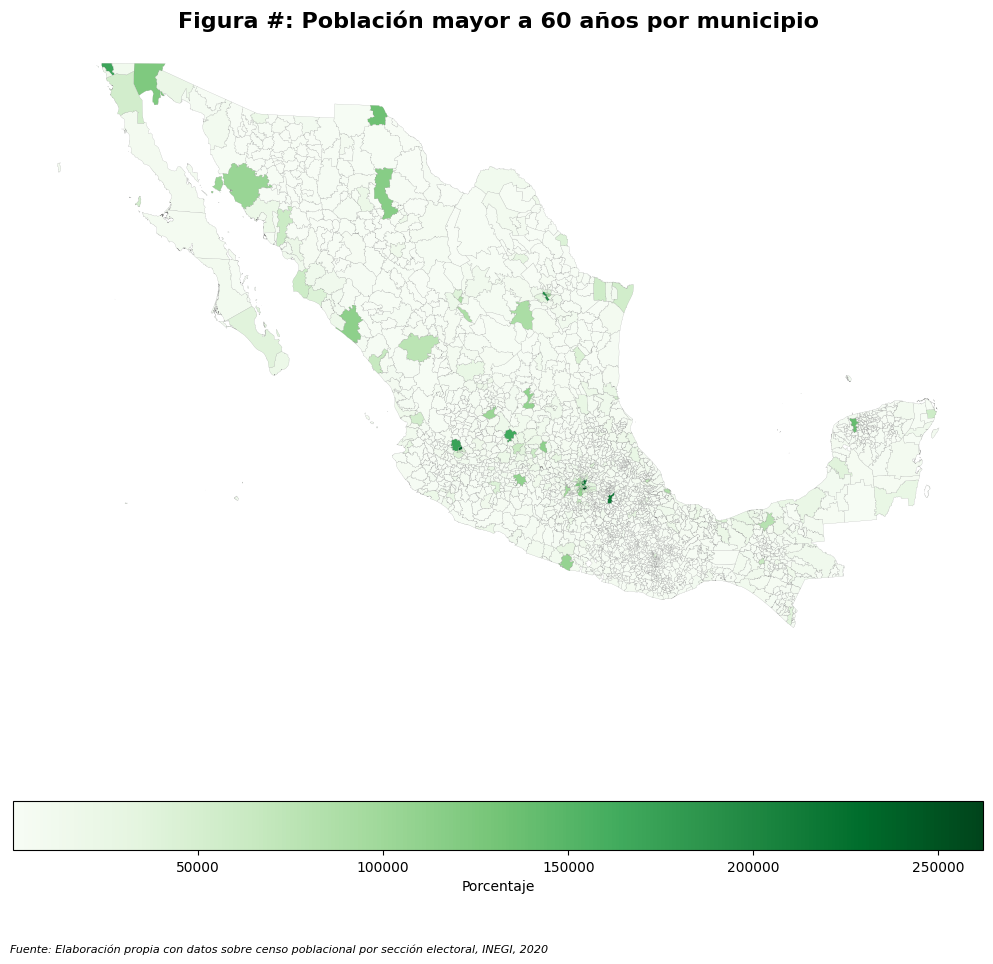

In [21]:
# Visualizamos la población mayor a 60 años por municipio
fig, ax = plt.subplots(figsize=(10, 10))
municipios_w_vars_senior.plot(column='POB_SENIOR', ax=ax, cmap='Greens', legend=True, edgecolor='grey', linewidth=0.1, legend_kwds={'label': 'Porcentaje', 'orientation': 'horizontal'})
ax.set_axis_off()
ax.set_title("Figura #: Población mayor a 60 años por municipio", fontsize=16, fontweight='bold')
plt.figtext(0.55, 0.01, "Fuente: Elaboración propia con datos sobre censo poblacional por sección electoral, INEGI, 2020", ha="right", fontsize=8, style='italic')
plt.tight_layout()
plt.show()

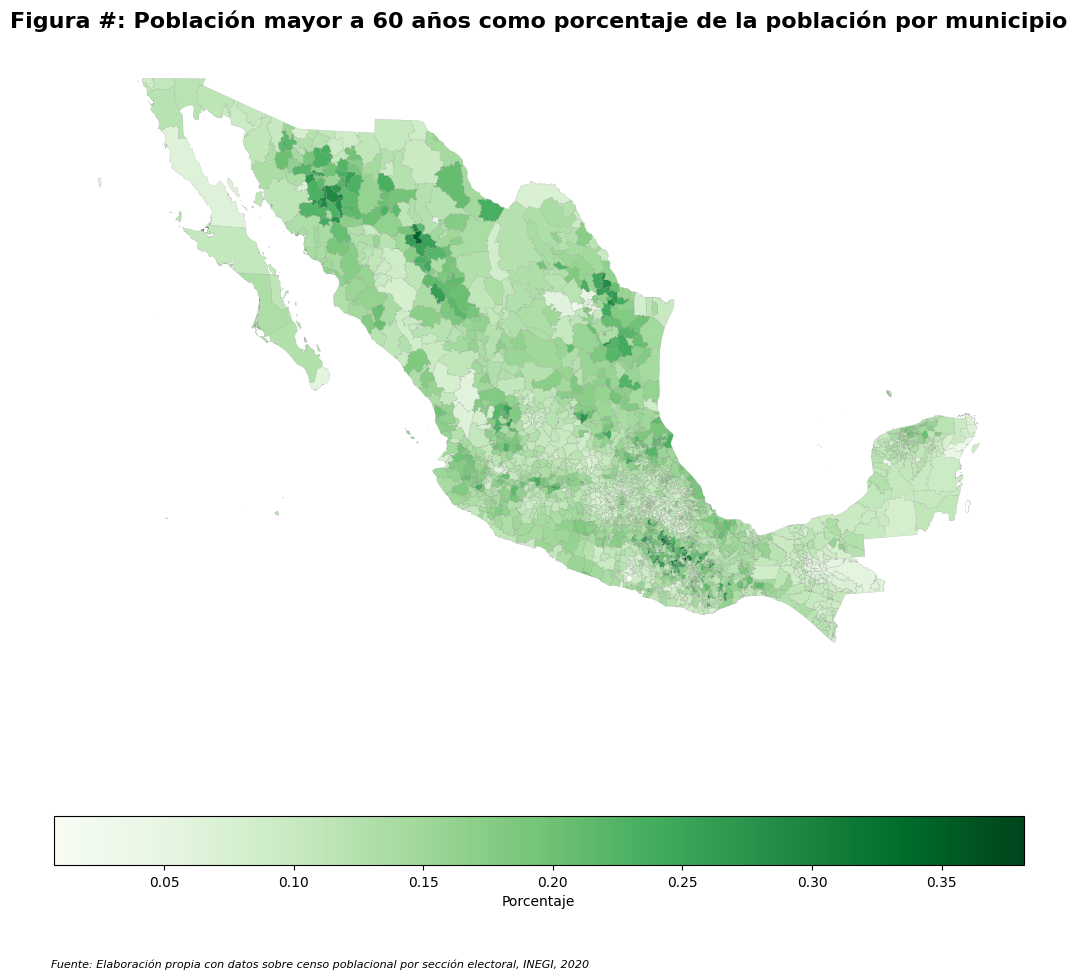

In [22]:
# Visualizamos la población mayor a 60 años como porcentaje de la poblacion de cada municipio 
fig, ax = plt.subplots(figsize=(10, 10))
municipios_w_vars_senior.plot(column='POB_SENIOR_PER', ax=ax, cmap='Greens', legend=True, edgecolor='grey', linewidth=0.1,legend_kwds={'label': 'Porcentaje', 'orientation': 'horizontal'})
ax.set_axis_off()
ax.set_title("Figura #: Población mayor a 60 años como porcentaje de la población por municipio", fontsize=16, fontweight='bold')
plt.figtext(0.55, 0.01, "Fuente: Elaboración propia con datos sobre censo poblacional por sección electoral, INEGI, 2020", ha="right", fontsize=8, style='italic')
plt.tight_layout()
plt.show()